In [1]:
import cv2
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from data import prepare_samples_areas, prepare_samples_direction, prepare_samples_colors
from models import cnn_network, flat_network, tree

In [2]:
def printResults(testLabels,testResults):
    print(confusion_matrix(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
    print(classification_report(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
    print("Cohen's Kappa: {}".format(cohen_kappa_score(testLabels.argmax(axis=1), testResults.argmax(axis=1))))
    return accuracy_score(testLabels.argmax(axis=1), testResults.argmax(axis=1))

###################################################



In [7]:
#samples,labels = prepare_samples_areas()
#samples,labels = prepare_samples_colors()
samples,labels = prepare_samples_direction()

(trainSamples, testSamples, trainLabels, testLabels) = train_test_split(samples, labels, test_size=0.25, random_state=42)

print("TREE")
testResults = tree(trainSamples,trainLabels,testSamples)
accTree = printResults(testLabels, testResults)
    
print("MLP - FLAT")
testResults = flat_network(trainSamples,trainLabels,testSamples)
accFlat = printResults(testLabels, testResults)
        
print("CNN")
testResults = cnn_network(trainSamples,trainLabels,testSamples)
accCnn = printResults(testLabels, testResults)

print("Accuracy TREE: {}".format(accTree))
print("Accuracy FLAT: {}".format(accFlat))
print("Accuracy CNN: {}".format(accCnn))

TREE
[[20  3]
 [ 6 21]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        23
           1       0.88      0.78      0.82        27

    accuracy                           0.82        50
   macro avg       0.82      0.82      0.82        50
weighted avg       0.83      0.82      0.82        50

Cohen's Kappa: 0.6411483253588517
MLP - FLAT
Epoch 1/20
3/3 [==============================] - 0s 2ms/step - loss: 0.8705 - accuracy: 0.4733
Epoch 2/20
3/3 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.6600
Epoch 3/20
3/3 [==============================] - 0s 3ms/step - loss: 0.5055 - accuracy: 0.7733
Epoch 4/20
3/3 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.8467
Epoch 5/20
3/3 [==============================] - 0s 4ms/step - loss: 0.4108 - accuracy: 0.8400
Epoch 6/20
3/3 [==============================] - 0s 3ms/step - loss: 0.3586 - accuracy: 0.9200
Epoch 7/20
3/3 [============

<ipython-input-8-80b8b2b657d1>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(labels)


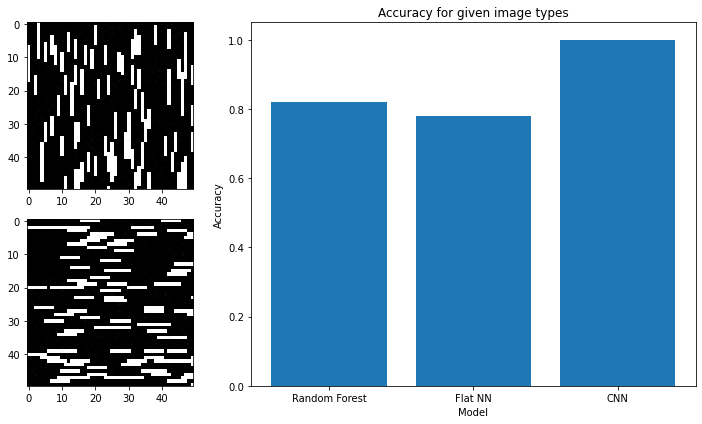

In [8]:
def plot_accuracy(values):
    hfig = cv2.imread('h.jpg')
    vfig = cv2.imread('v.jpg')
    fig, axs = plt.subplots(2, 3, figsize=(10, 6))
    axs[0,0].imshow(hfig)
    axs[1,0].imshow(vfig)
    axs[0,1].remove()
    axs[1,1].remove()
    axs[0,2].remove()
    axs[1,2].remove()
    gs = axs[0,1].get_gridspec()
    labels = ["Random Forest","Flat NN","CNN"]
    p = fig.add_subplot(gs[:, 1:])
    p.bar(labels, values)
    p.set_xlabel('Model')
    p.set_ylabel('Accuracy')
    p.set_xticklabels(labels)
    p.set_title('Accuracy for given image types')
    fig.tight_layout()
    plt.show()
plot_accuracy((accTree,accFlat,accCnn))

